In [1]:
#To do lambdaの外部入力
using SparseIR
using PyPlot
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["font.size"] = 16
rcParams["text.latex.preamble"] = raw"\usepackage{amsmath}"
using LinearAlgebra
using Revise
using Optim
using FFTW
using Zygote
include("./src/Nevanlinna.jl")

Main.Nevanlinna

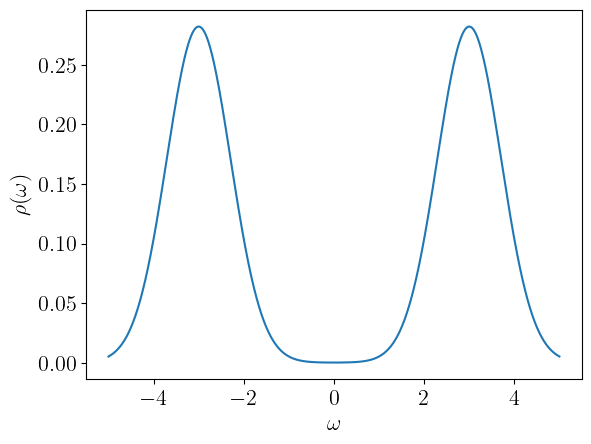

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2deffff430>

In [17]:
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)

#on-centered gaussian
#rho(omega) = gaussian(omega, 0.0, 0.15)  

#rho(omega) = gaussian(omega, 1.0, 0.15) +
#    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

#rho(omega) = 0.4*gaussian(omega, 1.0, 0.5) + 
#    0.4*gaussian(omega, 3.0, 0.8) + 0.2*gaussian(omega, -2.0, 1.0) 

######

rho(omega) = 0.5*gaussian(omega, -3.0, 1.0) + 0.5*gaussian(omega, 3.0, 1.0) 

#off-centered gaussian
#rho(omega) = gaussian(omega, 0.2, 0.05) 

omegas = LinRange(-5, 5, 1000)
plt.xlabel(L"\omega")
plt.ylabel(L"\rho(\omega)")
plt.plot(omegas, rho.(omegas))

In [18]:
beta = 100
wmax = 1000
IR_basis_set = FiniteTempBasisSet(Float64(beta), Float64(wmax), 1e-15) #もともと-7
#basis = FiniteTempBasis(fermion, beta, wmax, 1e-7)

rhol = [overlap(IR_basis_set.basis_f.v[l], rho) for l in 1:length(IR_basis_set.basis_f)]
gl = - IR_basis_set.basis_f.s .* rhol
;
#=
plt.semilogy(abs.(rhol), marker="o", label=L"|\rho_l|")
plt.semilogy(abs.(gl), marker="x", label=L"|g_l|")
plt.xlabel(L"l")
plt.ylim([1e-5, 1])
#plt.legend()
=#

In [19]:
gw = evaluate(IR_basis_set.smpl_wn_f, gl)
hnw = Int64(length(IR_basis_set.smpl_wn_f.sampling_points)/2)

71

In [20]:
setprecision(128)
;

In [21]:
test_gw   = Array{Complex{BigFloat}}(undef, hnw) 
test_smpl = Array{BigFloat}(undef, hnw) 
;

In [22]:
for i in 1:hnw
    test_smpl[i]= parse(BigFloat, string(IR_basis_set.smpl_wn_f.sampling_points[hnw+i]*pi/beta))
    test_gw[i]  = parse(BigFloat, string(real(gw[hnw+i]))) + parse(BigFloat, string(imag(gw[hnw+i])))*im
end

In [23]:
N_real    =  6000
omega_max =  10.0
eta       =  0.001
H         =  8
N_imag    =  Nevanlinna.calc_opt_N_imag(hnw, test_smpl, test_gw)
#N_imag = 71
@time result    = Nevanlinna.Nevanlinna_Schur(N_imag, test_smpl, test_gw, N_real, omega_max, eta, H, true)
opt_real = result[2]
;

N_imag is setted as 31
Pick matrix is positive semi-definite.
Iter     Function value   Gradient norm 
     0     1.287394e+02     2.130157e+02
 * time: 0.00023293495178222656
     1     8.017261e+01     2.762375e+02
 * time: 7.46281099319458
     2     6.746792e+01     2.292417e+02
 * time: 16.212607860565186
     3     4.584654e+01     1.408186e+02
 * time: 21.460909843444824
     4     4.134298e+01     1.250166e+02
 * time: 27.047363996505737
     5     2.680576e+01     9.066631e+01
 * time: 28.331292867660522
     6     2.647325e+01     9.007591e+01
 * time: 30.943209886550903
     7     1.211455e+01     2.420932e+01
 * time: 33.57853984832764
     8     1.206005e+01     2.210525e+01
 * time: 35.68287992477417
     9     1.198794e+01     2.191374e+01
 * time: 37.638519048690796
    10     9.815040e+00     1.494711e+01
 * time: 40.45265293121338
    11     8.968513e+00     1.329241e+01
 * time: 42.56192493438721
    12     7.669405e+00     9.988367e+00
 * time: 44.534881830215454
  

   118     1.059877e+00     1.166182e+00
 * time: 307.51951599121094
   119     1.059583e+00     6.334866e+00
 * time: 309.31781482696533
   120     1.059377e+00     3.219876e+00
 * time: 310.54825592041016
   121     1.059261e+00     1.999650e+00
 * time: 312.2758278846741
   122     1.057219e+00     1.494713e+01
 * time: 314.21019101142883
   123     1.055861e+00     1.372903e+00
 * time: 318.74488401412964
   124     1.055272e+00     2.761250e+00
 * time: 320.0100779533386
   125     1.055092e+00     3.625211e+00
 * time: 323.11410903930664
   126     1.055035e+00     2.618144e+00
 * time: 326.1628530025482
   127     1.054807e+00     4.519717e+00
 * time: 328.0089910030365
   128     1.054587e+00     2.526046e+00
 * time: 331.1100609302521
   129     1.054375e+00     4.406414e+00
 * time: 333.7317898273468
   130     1.054170e+00     2.452506e+00
 * time: 337.4664988517761
   131     1.053970e+00     4.330251e+00
 * time: 339.2668888568878
   132     1.053776e+00     2.397379e+00
 

   239     9.566803e-01     7.564919e+00
 * time: 586.1434779167175
   240     9.498259e-01     1.575893e+01
 * time: 587.9310200214386
   241     9.471578e-01     1.753767e+01
 * time: 589.124979019165
   242     9.414002e-01     7.653459e+00
 * time: 590.3129968643188
   243     9.383885e-01     6.937419e+00
 * time: 591.6393940448761
   244     9.346468e-01     6.287710e+00
 * time: 593.4814138412476
   245     9.298336e-01     7.049069e+00
 * time: 595.2868249416351
   246     9.286964e-01     5.151910e+00
 * time: 597.1137838363647
   247     9.269794e-01     8.576871e+00
 * time: 598.2688889503479
   248     9.249317e-01     7.546994e+00
 * time: 599.4797649383545
   249     9.208874e-01     5.693849e+00
 * time: 600.6810128688812
   250     9.197103e-01     5.733312e+00
 * time: 601.9198398590088
   251     9.175140e-01     1.641706e+00
 * time: 603.0990839004517
   252     9.165720e-01     8.158112e-01
 * time: 604.2775239944458
   253     9.149746e-01     4.220839e+00
 * time:

   360     8.730839e-01     3.657665e+00
 * time: 818.8286979198456
   361     8.730634e-01     4.139685e+00
 * time: 820.9330189228058
   362     8.730523e-01     4.013755e+00
 * time: 825.1698229312897
   363     8.730405e-01     3.732029e+00
 * time: 827.2017338275909
   364     8.730083e-01     4.373579e+00
 * time: 830.6443178653717
   365     8.729718e-01     3.812927e+00
 * time: 833.3471579551697
   366     8.729408e-01     4.408674e+00
 * time: 836.2293548583984
   367     8.729057e-01     3.842650e+00
 * time: 839.4000689983368
   368     8.728748e-01     4.397983e+00
 * time: 842.3950090408325
   369     8.728395e-01     3.813485e+00
 * time: 845.109493970871
   370     8.728075e-01     4.329983e+00
 * time: 847.7868900299072
   371     8.727710e-01     3.714843e+00
 * time: 849.9600539207458
   372     8.727371e-01     4.191016e+00
 * time: 852.7660119533539
   373     8.727285e-01     4.112892e+00
 * time: 854.2446138858795
   374     8.726978e-01     3.534037e+00
 * time:

   481     8.604688e-01     4.932870e-01
 * time: 1067.599436044693
   482     8.604621e-01     5.030528e-01
 * time: 1068.9781398773193
   483     8.604556e-01     5.079046e-01
 * time: 1070.3737409114838
   484     8.604502e-01     4.011661e-01
 * time: 1071.8006949424744
   485     8.604445e-01     4.766038e-01
 * time: 1073.2589180469513
   486     8.604394e-01     3.737733e-01
 * time: 1074.6685428619385
   487     8.604339e-01     3.470501e-01
 * time: 1076.0760879516602
   488     8.604290e-01     4.830083e-01
 * time: 1077.5199179649353
   489     8.604236e-01     5.253560e-01
 * time: 1078.9165289402008
   490     8.604186e-01     6.476032e-01
 * time: 1080.4094460010529
   491     8.604132e-01     7.239265e-01
 * time: 1081.8132948875427
   492     8.604081e-01     7.807952e-01
 * time: 1083.2372369766235
   493     8.604025e-01     8.304095e-01
 * time: 1084.609603881836
   494     8.603973e-01     8.374040e-01
 * time: 1085.9305069446564
   495     8.603912e-01     8.605257

   601     8.476758e-01     8.657310e+00
 * time: 1289.6758499145508
   602     8.476621e-01     6.512158e+00
 * time: 1291.0346908569336
   603     8.475375e-01     1.249595e+01
 * time: 1292.346424818039
   604     8.474737e-01     5.954870e+00
 * time: 1294.3650410175323
   605     8.474025e-01     1.069161e+01
 * time: 1295.7281019687653
   606     8.473901e-01     9.873156e+00
 * time: 1297.1263618469238
   607     8.473541e-01     6.762661e+00
 * time: 1298.5740368366241
   608     8.469443e-01     4.631931e+00
 * time: 1300.0550329685211
   609     8.469059e-01     8.983594e+00
 * time: 1301.4520058631897
   610     8.467421e-01     7.226559e+00
 * time: 1302.744453907013
   611     8.466600e-01     4.620055e+00
 * time: 1304.0332169532776
   612     8.464280e-01     8.029880e+00
 * time: 1305.3369460105896
   613     8.463771e-01     3.819839e+00
 * time: 1306.6259589195251
   614     8.461928e-01     8.210486e+00
 * time: 1308.03058385849
   615     8.461356e-01     2.652794e+

   721     8.231829e-01     1.734315e+01
 * time: 1472.830013036728
   722     8.229969e-01     2.542429e+00
 * time: 1474.219367980957
   723     8.226726e-01     2.027599e+01
 * time: 1476.1747539043427
   724     8.224769e-01     2.978761e+00
 * time: 1477.4873929023743
   725     8.221841e-01     2.264251e+01
 * time: 1479.5884058475494
   726     8.220018e-01     3.236104e+00
 * time: 1480.9663970470428
   727     8.214266e-01     2.757336e+01
 * time: 1482.952111005783
   728     8.211608e-01     2.375531e+00
 * time: 1484.229898929596
   729     8.204394e-01     5.450808e+00
 * time: 1486.2028028964996
   730     8.198329e-01     4.428340e+01
 * time: 1488.1623740196228
   731     8.193486e-01     6.157564e+00
 * time: 1490.1045579910278
   732     8.187901e-01     4.100413e+01
 * time: 1491.3876059055328
   733     8.183706e-01     6.861322e+00
 * time: 1492.7052669525146
   734     8.174547e-01     2.452308e+01
 * time: 1494.6428878307343
   735     8.173096e-01     3.661201e+

   841     7.987227e-01     2.314276e+00
 * time: 1653.7069039344788
   842     7.982898e-01     4.528851e+01
 * time: 1655.7030379772186
   843     7.982372e-01     3.918108e+01
 * time: 1656.9928410053253
   844     7.980522e-01     5.836577e+00
 * time: 1658.2302119731903
   845     7.979057e-01     1.263017e+00
 * time: 1660.2725930213928
   846     7.978654e-01     8.571040e+00
 * time: 1662.3194999694824
   847     7.978357e-01     7.882005e+00
 * time: 1663.6147818565369
   848     7.977859e-01     1.177411e+01
 * time: 1665.6663999557495
   849     7.977473e-01     5.515876e+00
 * time: 1667.0398218631744
   850     7.977029e-01     1.424876e+01
 * time: 1669.0837848186493
   851     7.976671e-01     2.161345e+00
 * time: 1670.435909986496
   852     7.976194e-01     1.595532e+01
 * time: 1672.5093688964844
   853     7.975769e-01     2.629711e+00
 * time: 1673.7956919670105
   854     7.975261e-01     1.356833e+01
 * time: 1675.2722399234772
   855     7.974832e-01     5.68582

   961     7.920156e-01     3.224771e+00
 * time: 1816.6407299041748
   962     7.919967e-01     2.071672e+00
 * time: 1818.581405878067
   963     7.919716e-01     3.400934e+00
 * time: 1820.5330069065094
   964     7.919616e-01     1.165791e+01
 * time: 1821.8989539146423
   965     7.919439e-01     3.476795e+00
 * time: 1823.5953650474548
   966     7.919249e-01     9.945816e+00
 * time: 1825.4840250015259
   967     7.919068e-01     4.945641e+00
 * time: 1827.515772819519
   968     7.918899e-01     7.842641e+00
 * time: 1829.8961808681488
   969     7.918742e-01     5.378176e+00
 * time: 1831.7088458538055
   970     7.918593e-01     7.047788e+00
 * time: 1833.2784459590912
   971     7.918452e-01     4.953392e+00
 * time: 1834.833822965622
   972     7.918315e-01     6.880482e+00
 * time: 1836.2276270389557
   973     7.918184e-01     4.659922e+00
 * time: 1837.6146609783173
   974     7.918056e-01     6.311776e+00
 * time: 1839.163025856018
   975     7.917936e-01     4.943425e+

  1081     7.893518e-01     2.801939e+01
 * time: 2002.942342042923
  1082     7.892671e-01     1.007744e+01
 * time: 2004.318316936493
  1083     7.891984e-01     3.455348e+00
 * time: 2006.3218228816986
  1084     7.891286e-01     1.239380e+01
 * time: 2008.7069079875946
  1085     7.891053e-01     6.097889e+00
 * time: 2010.1403028964996
  1086     7.890252e-01     1.299762e+01
 * time: 2012.2422740459442
  1087     7.889825e-01     1.272238e+01
 * time: 2013.7385790348053
  1088     7.888501e-01     2.694571e+01
 * time: 2015.8017890453339
  1089     7.887962e-01     6.073761e+00
 * time: 2017.1855640411377
  1090     7.886493e-01     1.797193e+01
 * time: 2020.242821931839
  1091     7.886273e-01     2.443488e+00
 * time: 2021.8941679000854
  1092     7.885803e-01     2.221138e+01
 * time: 2023.7782189846039
  1093     7.885407e-01     5.595078e+00
 * time: 2025.4994459152222
  1094     7.884915e-01     2.063553e+01
 * time: 2027.550884962082
  1095     7.884717e-01     7.492519e+

  1201     7.861152e-01     9.247997e+00
 * time: 2185.2533168792725
  1202     7.861010e-01     2.990961e+00
 * time: 2186.485086917877
  1203     7.860866e-01     8.883688e+00
 * time: 2187.7864818573
  1204     7.860721e-01     3.348370e+00
 * time: 2189.200134038925
  1205     7.860574e-01     8.564975e+00
 * time: 2190.767868041992
  1206     7.860425e-01     3.644287e+00
 * time: 2192.1689038276672
  1207     7.860275e-01     8.313663e+00
 * time: 2193.488555908203
  1208     7.860123e-01     3.858046e+00
 * time: 2194.8504660129547
  1209     7.859969e-01     8.144502e+00
 * time: 2196.278690814972
  1210     7.859814e-01     3.980630e+00
 * time: 2197.5891218185425
  1211     7.859657e-01     8.064023e+00
 * time: 2199.0276148319244
  1212     7.859498e-01     4.014494e+00
 * time: 2200.3760879039764
  1213     7.859338e-01     8.069993e+00
 * time: 2201.70281291008
  1214     7.859177e-01     3.970795e+00
 * time: 2203.0652298927307
  1215     7.859014e-01     8.151852e+00
 * 

  1321     7.840361e-01     1.095643e+01
 * time: 2345.4836049079895
  1322     7.840166e-01     3.690759e+00
 * time: 2346.7889029979706
  1323     7.839970e-01     1.088102e+01
 * time: 2348.0772399902344
  1324     7.839773e-01     3.925834e+00
 * time: 2349.492733001709
  1325     7.839576e-01     1.078481e+01
 * time: 2350.754837989807
  1326     7.839378e-01     4.176635e+00
 * time: 2352.033289909363
  1327     7.839180e-01     1.068296e+01
 * time: 2353.3856098651886
  1328     7.838981e-01     4.430106e+00
 * time: 2354.742514848709
  1329     7.838781e-01     1.058906e+01
 * time: 2356.1003189086914
  1330     7.838580e-01     4.675029e+00
 * time: 2357.5816688537598
  1331     7.838379e-01     1.051374e+01
 * time: 2358.897567987442
  1332     7.838177e-01     4.903058e+00
 * time: 2360.3182048797607
  1333     7.837973e-01     1.046374e+01
 * time: 2361.6514739990234
  1334     7.837769e-01     5.109333e+00
 * time: 2363.138461828232
  1335     7.837564e-01     1.044147e+01

  1441     7.811775e-01     1.717697e+01
 * time: 2508.883481025696
  1442     7.811456e-01     5.128036e+00
 * time: 2510.244349002838
  1443     7.811147e-01     1.644926e+01
 * time: 2511.6790850162506
  1444     7.810827e-01     6.008052e+00
 * time: 2513.055687904358
  1445     7.810522e-01     1.300600e+01
 * time: 2515.1166729927063
  1446     7.810240e-01     8.425880e+00
 * time: 2516.4428238868713
  1447     7.809980e-01     1.164838e+01
 * time: 2517.684425830841
  1448     7.809731e-01     8.418823e+00
 * time: 2518.9590108394623
  1449     7.809435e-01     1.356758e+01
 * time: 2520.2261040210724
  1450     7.809147e-01     7.581600e+00
 * time: 2521.524032831192
  1451     7.808865e-01     1.276131e+01
 * time: 2522.874184846878
  1452     7.808575e-01     8.483448e+00
 * time: 2524.167858839035
  1453     7.808283e-01     1.006861e+01
 * time: 2526.146446943283
  1454     7.807995e-01     1.096239e+01
 * time: 2527.4058718681335
  1455     7.807713e-01     9.735070e+00
 

  1561     7.744286e-01     1.292329e+01
 * time: 2760.261834859848
  1562     7.742256e-01     1.767130e+01
 * time: 2761.584645986557
  1563     7.741071e-01     3.037614e+00
 * time: 2762.882539987564
  1564     7.739672e-01     3.929742e+01
 * time: 2764.117488861084
  1565     7.738623e-01     3.613260e+01
 * time: 2765.3829679489136
  1566     7.737688e-01     5.720952e+01
 * time: 2766.726739883423
  1567     7.736899e-01     4.478456e+01
 * time: 2767.9849388599396
  1568     7.736079e-01     5.241441e+01
 * time: 2769.1983120441437
  1569     7.735385e-01     3.446061e+01
 * time: 2770.3314878940582
  1570     7.734750e-01     4.028571e+01
 * time: 2771.51109790802
  1571     7.734210e-01     2.483187e+01
 * time: 2772.6828639507294
  1572     7.733667e-01     3.454065e+01
 * time: 2773.884439945221
  1573     7.733148e-01     2.282444e+01
 * time: 2775.067060947418
  1574     7.732631e-01     3.474032e+01
 * time: 2776.2584459781647
  1575     7.732126e-01     2.561481e+01
 *

  1681     7.580332e-01     1.638258e+02
 * time: 2935.0510518550873
  1682     7.578047e-01     1.340460e+02
 * time: 2936.491219997406
  1683     7.572887e-01     2.064325e+02
 * time: 2938.5815889835358
  1684     7.569926e-01     1.309080e+02
 * time: 2940.677248954773
  1685     7.566088e-01     1.742451e+02
 * time: 2942.1330800056458
  1686     7.563221e-01     1.178987e+02
 * time: 2943.586891889572
  1687     7.559095e-01     2.170291e+02
 * time: 2944.964661836624
  1688     7.553657e-01     8.293693e+01
 * time: 2946.390147924423
  1689     7.547026e-01     2.486132e+02
 * time: 2947.899803876877
  1690     7.539736e-01     8.367692e+01
 * time: 2949.2933208942413
  1691     7.532192e-01     2.532952e+02
 * time: 2950.7330520153046
  1692     7.523679e-01     6.784172e+01
 * time: 2952.0467870235443
  1693     7.515098e-01     2.391080e+02
 * time: 2953.4755890369415
  1694     7.505437e-01     4.346149e+01
 * time: 2954.9118390083313
  1695     7.496839e-01     2.012789e+02

  1801     7.214774e-01     9.171334e+01
 * time: 3130.5069558620453
  1802     7.213913e-01     1.378548e+01
 * time: 3131.9392669200897
  1803     7.213026e-01     9.188901e+01
 * time: 3133.3174908161163
  1804     7.212213e-01     1.620024e+01
 * time: 3134.706920862198
  1805     7.211364e-01     9.350187e+01
 * time: 3136.287453889847
  1806     7.210587e-01     1.937209e+01
 * time: 3137.6841950416565
  1807     7.209716e-01     9.783750e+01
 * time: 3139.0516769886017
  1808     7.208914e-01     2.266205e+01
 * time: 3140.458741903305
  1809     7.207917e-01     1.065696e+02
 * time: 3141.8931238651276
  1810     7.207009e-01     2.720511e+01
 * time: 3143.3609478473663
  1811     7.205588e-01     1.272744e+02
 * time: 3144.811290025711
  1812     7.204361e-01     3.662970e+01
 * time: 3146.25181388855
  1813     7.198563e-01     1.964210e+02
 * time: 3148.3459239006042
  1814     7.196258e-01     6.764821e+01
 * time: 3149.7284400463104
  1815     7.194961e-01     7.437986e+00

  1921     7.045174e-01     4.773424e+01
 * time: 3310.2115428447723
  1922     7.044641e-01     4.087517e+01
 * time: 3311.305061817169
  1923     7.043299e-01     8.405510e+01
 * time: 3312.4865770339966
  1924     7.042044e-01     4.757249e+01
 * time: 3313.7140090465546
  1925     7.040878e-01     6.664165e+01
 * time: 3314.800398826599
  1926     7.040013e-01     3.854886e+01
 * time: 3315.86283493042
  1927     7.039007e-01     7.190853e+01
 * time: 3316.942435026169
  1928     7.038230e-01     2.114751e+01
 * time: 3318.180413007736
  1929     7.036066e-01     1.218845e+02
 * time: 3319.868563890457
  1930     7.035821e-01     1.075694e+02
 * time: 3320.9963269233704
  1931     7.034631e-01     2.544531e+01
 * time: 3322.109242916107
  1932     7.033174e-01     4.477813e+01
 * time: 3323.997663974762
  1933     7.032730e-01     3.550342e+01
 * time: 3325.332505941391
  1934     7.031792e-01     7.360146e+01
 * time: 3327.024518966675
  1935     7.031050e-01     3.381844e+01
 * t

  2041     6.911623e-01     1.820628e+01
 * time: 3510.493639945984
  2042     6.911196e-01     6.516115e+01
 * time: 3512.465943813324
  2043     6.910899e-01     1.791295e+01
 * time: 3513.8565859794617
  2044     6.910409e-01     7.770241e+01
 * time: 3515.8749029636383
  2045     6.910036e-01     1.509463e+01
 * time: 3517.1505348682404
  2046     6.909416e-01     9.257711e+01
 * time: 3519.084023952484
  2047     6.908954e-01     5.522912e+00
 * time: 3520.397547006607
  2048     6.907653e-01     9.125875e+00
 * time: 3522.959380865097
  2049     6.907584e-01     3.280762e+01
 * time: 3524.185788869858
  2050     6.907445e-01     2.415347e+01
 * time: 3525.5104768276215
  2051     6.907252e-01     4.350212e+01
 * time: 3526.9079020023346
  2052     6.907047e-01     2.305885e+01
 * time: 3528.2647709846497
  2053     6.906812e-01     5.011673e+01
 * time: 3529.7611968517303
  2054     6.906601e-01     1.536304e+01
 * time: 3531.0556728839874
  2055     6.906359e-01     5.667253e+01

  2161     6.893135e-01     2.335710e+01
 * time: 3679.1974759101868
  2162     6.893087e-01     1.194050e+01
 * time: 3680.591243982315
  2163     6.893040e-01     2.297860e+01
 * time: 3681.9421038627625
  2164     6.892995e-01     1.117800e+01
 * time: 3683.305186986923
  2165     6.892950e-01     2.269153e+01
 * time: 3684.6975769996643
  2166     6.892908e-01     1.045589e+01
 * time: 3686.024803876877
  2167     6.892866e-01     2.254719e+01
 * time: 3687.3724739551544
  2168     6.892825e-01     9.793776e+00
 * time: 3688.7752368450165
  2169     6.892785e-01     2.256665e+01
 * time: 3690.1066069602966
  2170     6.892745e-01     9.189413e+00
 * time: 3691.4370658397675
  2171     6.892706e-01     2.274684e+01
 * time: 3692.8270258903503
  2172     6.892667e-01     8.624827e+00
 * time: 3694.2240238189697
  2173     6.892629e-01     2.306914e+01
 * time: 3695.55672287941
  2174     6.892591e-01     8.074471e+00
 * time: 3696.9390218257904
  2175     6.892552e-01     2.350830e+0

  2281     6.888112e-01     1.299161e+00
 * time: 3857.5441069602966
  2282     6.888082e-01     2.524810e+01
 * time: 3858.928930044174
  2283     6.888052e-01     1.225627e+00
 * time: 3860.351793050766
  2284     6.888021e-01     2.580768e+01
 * time: 3861.7468209266663
  2285     6.887990e-01     9.283829e-01
 * time: 3863.1537368297577
  2286     6.887959e-01     2.619878e+01
 * time: 3864.5254759788513
  2287     6.887928e-01     5.121419e-01
 * time: 3866.081818819046
  2288     6.887897e-01     2.643296e+01
 * time: 3867.44588303566
  2289     6.887867e-01     1.196185e-01
 * time: 3868.8612139225006
  2290     6.887835e-01     2.650750e+01
 * time: 3870.2870898246765
  2291     6.887806e-01     1.393379e-01
 * time: 3871.70166182518
  2292     6.887775e-01     2.638158e+01
 * time: 3873.1494150161743
  2293     6.887746e-01     1.749044e-01
 * time: 3874.5716688632965
  2294     6.887716e-01     2.607035e+01
 * time: 3876.000550031662
  2295     6.887688e-01     5.542855e-02
 

  2401     6.885256e-01     1.826752e+00
 * time: 4036.5397579669952
  2402     6.885244e-01     1.515062e+01
 * time: 4038.001457929611
  2403     6.885233e-01     1.665153e+00
 * time: 4039.4472348690033
  2404     6.885221e-01     1.488428e+01
 * time: 4040.7353010177612
  2405     6.885210e-01     1.489128e+00
 * time: 4042.1067368984222
  2406     6.885198e-01     1.459570e+01
 * time: 4043.42919588089
  2407     6.885187e-01     1.290218e+00
 * time: 4044.818953037262
  2408     6.885176e-01     1.427948e+01
 * time: 4046.23481297493
  2409     6.885164e-01     1.064853e+00
 * time: 4047.6066110134125
  2410     6.885153e-01     1.393530e+01
 * time: 4049.0750398635864
  2411     6.885142e-01     8.138939e-01
 * time: 4050.4174389839172
  2412     6.885130e-01     1.356712e+01
 * time: 4051.803992986679
  2413     6.885119e-01     5.417826e-01
 * time: 4053.214588880539
  2414     6.885108e-01     1.318195e+01
 * time: 4054.6061959266663
  2415     6.885097e-01     2.558952e-01
 

  2522     6.884034e-01     2.007699e+00
 * time: 4204.133404016495
  2523     6.884025e-01     9.587795e+00
 * time: 4205.5688009262085
  2524     6.884017e-01     2.092035e+00
 * time: 4206.975615024567
  2525     6.884008e-01     9.429362e+00
 * time: 4208.282846927643
  2526     6.884000e-01     2.183737e+00
 * time: 4209.635993003845
  2527     6.883991e-01     9.260340e+00
 * time: 4211.0236229896545
  2528     6.883983e-01     2.282314e+00
 * time: 4212.390251874924
  2529     6.883975e-01     9.083264e+00
 * time: 4213.762274026871
  2530     6.883966e-01     2.386465e+00
 * time: 4215.085937023163
  2531     6.883958e-01     8.901689e+00
 * time: 4216.492837905884
  2532     6.883950e-01     2.494194e+00
 * time: 4217.847744941711
  2533     6.883942e-01     8.719918e+00
 * time: 4219.23920583725
  2534     6.883934e-01     2.602948e+00
 * time: 4220.573402881622
  2535     6.883926e-01     8.542656e+00
 * time: 4221.998549938202
  2536     6.883918e-01     2.709778e+00
 * tim

  2643     6.883066e-01     8.775336e+00
 * time: 4363.93160700798
  2644     6.883058e-01     1.588329e+00
 * time: 4365.19825387001
  2645     6.883051e-01     8.689768e+00
 * time: 4366.497889041901
  2646     6.883043e-01     1.717324e+00
 * time: 4367.743875026703
  2647     6.883035e-01     8.605768e+00
 * time: 4369.026376008987
  2648     6.883028e-01     1.843063e+00
 * time: 4370.362233877182
  2649     6.883020e-01     8.523514e+00
 * time: 4371.642868041992
  2650     6.883012e-01     1.965277e+00
 * time: 4372.900061845779
  2651     6.883004e-01     8.442881e+00
 * time: 4374.174290895462
  2652     6.882997e-01     2.084080e+00
 * time: 4375.423138856888
  2653     6.882989e-01     8.363522e+00
 * time: 4376.719636917114
  2654     6.882981e-01     2.199881e+00
 * time: 4378.010186910629
  2655     6.882974e-01     8.284954e+00
 * time: 4379.260023832321
  2656     6.882966e-01     2.313276e+00
 * time: 4380.533982992172
  2657     6.882958e-01     8.206651e+00
 * time: 

  2764     6.882158e-01     2.501744e+00
 * time: 4520.755024909973
  2765     6.882151e-01     7.609331e+00
 * time: 4521.9116089344025
  2766     6.882143e-01     2.531475e+00
 * time: 4523.033825874329
  2767     6.882136e-01     7.557225e+00
 * time: 4524.216547012329
  2768     6.882128e-01     2.567387e+00
 * time: 4525.352860927582
  2769     6.882121e-01     7.498103e+00
 * time: 4526.469307899475
  2770     6.882113e-01     2.610059e+00
 * time: 4527.656460046768
  2771     6.882106e-01     7.431470e+00
 * time: 4528.838999032974
  2772     6.882098e-01     2.660065e+00
 * time: 4530.057410955429
  2773     6.882091e-01     7.356906e+00
 * time: 4531.158064842224
  2774     6.882083e-01     2.718230e+00
 * time: 4532.278837919235
  2775     6.882076e-01     7.274107e+00
 * time: 4533.401093006134
  2776     6.882069e-01     2.785142e+00
 * time: 4534.51772403717
  2777     6.882061e-01     7.182920e+00
 * time: 4535.680105924606
  2778     6.882054e-01     2.860723e+00
 * time

  2885     6.881341e-01     8.216223e+00
 * time: 4657.216943979263
  2886     6.881336e-01     3.290446e-01
 * time: 4658.321840047836
  2887     6.881330e-01     8.229211e+00
 * time: 4659.457799911499
  2888     6.881325e-01     2.903191e-01
 * time: 4660.734632015228
  2889     6.881320e-01     8.238216e+00
 * time: 4661.884114980698
  2890     6.881315e-01     2.544272e-01
 * time: 4663.025513887405
  2891     6.881309e-01     8.243369e+00
 * time: 4664.097287893295
  2892     6.881304e-01     2.211930e-01
 * time: 4665.180335998535
  2893     6.881299e-01     8.244746e+00
 * time: 4666.246692895889
  2894     6.881294e-01     1.905488e-01
 * time: 4667.348422050476
  2895     6.881288e-01     8.242362e+00
 * time: 4668.449118852615
  2896     6.881283e-01     1.626035e-01
 * time: 4669.575847864151
  2897     6.881278e-01     8.236182e+00
 * time: 4670.601903915405
  2898     6.881273e-01     1.374010e-01
 * time: 4671.6855499744415
  2899     6.881268e-01     8.226124e+00
 * tim

  3006     6.880745e-01     5.205254e-01
 * time: 4815.2050750255585
  3007     6.880740e-01     7.132134e+00
 * time: 4816.691004037857
  3008     6.880736e-01     5.493990e-01
 * time: 4818.091590881348
  3009     6.880731e-01     7.101081e+00
 * time: 4819.466590881348
  3010     6.880727e-01     5.777390e-01
 * time: 4820.828585863113
  3011     6.880722e-01     7.068650e+00
 * time: 4822.153205871582
  3012     6.880717e-01     6.050735e-01
 * time: 4823.528759002686
  3013     6.880713e-01     7.035152e+00
 * time: 4824.853199005127
  3014     6.880708e-01     6.309823e-01
 * time: 4826.385560035706
  3015     6.880704e-01     7.000879e+00
 * time: 4827.722065925598
  3016     6.880699e-01     6.551114e-01
 * time: 4829.089586019516
  3017     6.880695e-01     6.966083e+00
 * time: 4830.476841926575
  3018     6.880690e-01     6.771835e-01
 * time: 4831.91108584404
  3019     6.880686e-01     6.930975e+00
 * time: 4833.303810834885
  3020     6.880681e-01     6.970049e-01
 * time

  3127     6.880271e-01     6.815545e+00
 * time: 4985.000258922577
  3128     6.880267e-01     7.838680e-01
 * time: 4986.4461369514465
  3129     6.880264e-01     6.834945e+00
 * time: 4987.876883983612
  3130     6.880260e-01     8.221498e-01
 * time: 4989.272498846054
  3131     6.880257e-01     6.850235e+00
 * time: 4990.651783943176
  3132     6.880253e-01     8.557379e-01
 * time: 4992.093425035477
  3133     6.880250e-01     6.861107e+00
 * time: 4993.55508184433
  3134     6.880247e-01     8.844175e-01
 * time: 4995.044307947159
  3135     6.880243e-01     6.867351e+00
 * time: 4996.643139839172
  3136     6.880240e-01     9.080746e-01
 * time: 4998.108557939529
  3137     6.880237e-01     6.868859e+00
 * time: 4999.608743906021
  3138     6.880233e-01     9.267012e-01
 * time: 5001.012125015259
  3139     6.880230e-01     6.865636e+00
 * time: 5002.452301025391
  3140     6.880226e-01     9.403951e-01
 * time: 5003.8554220199585
  3141     6.880223e-01     6.857796e+00
 * tim

  3248     6.879913e-01     1.197904e+00
 * time: 5151.2510850429535
  3249     6.879910e-01     6.675080e+00
 * time: 5152.548080921173
  3250     6.879908e-01     1.227300e+00
 * time: 5153.886188030243
  3251     6.879905e-01     6.693570e+00
 * time: 5155.13059091568
  3252     6.879903e-01     1.254361e+00
 * time: 5156.411063909531
  3253     6.879900e-01     6.709558e+00
 * time: 5157.714558839798
  3254     6.879898e-01     1.278883e+00
 * time: 5159.017019987106
  3255     6.879895e-01     6.722839e+00
 * time: 5160.305986881256
  3256     6.879892e-01     1.300680e+00
 * time: 5161.551996946335
  3257     6.879890e-01     6.733222e+00
 * time: 5162.871716976166
  3258     6.879887e-01     1.319592e+00
 * time: 5164.125221014023
  3259     6.879885e-01     6.740528e+00
 * time: 5165.410504817963
  3260     6.879882e-01     1.335479e+00
 * time: 5166.675348043442
  3261     6.879880e-01     6.744599e+00
 * time: 5167.972973823547
  3262     6.879877e-01     1.348226e+00
 * time

  3369     6.879633e-01     5.171405e+00
 * time: 5306.7453508377075
  3370     6.879631e-01     3.274993e-01
 * time: 5308.049357891083
  3371     6.879629e-01     5.179473e+00
 * time: 5309.241185903549
  3372     6.879627e-01     3.355931e-01
 * time: 5310.484477043152
  3373     6.879625e-01     5.189243e+00
 * time: 5311.7590708732605
  3374     6.879623e-01     3.451458e-01
 * time: 5313.085327863693
  3375     6.879621e-01     5.200600e+00
 * time: 5314.366369009018
  3376     6.879619e-01     3.560732e-01
 * time: 5315.58975982666
  3377     6.879617e-01     5.213421e+00
 * time: 5316.870384931564
  3378     6.879615e-01     3.682855e-01
 * time: 5318.128469944
  3379     6.879613e-01     5.227576e+00
 * time: 5319.409970998764
  3380     6.879611e-01     3.816865e-01
 * time: 5320.690325975418
  3381     6.879609e-01     5.242927e+00
 * time: 5322.018136978149
  3382     6.879607e-01     3.961729e-01
 * time: 5323.245620012283
  3383     6.879605e-01     5.259327e+00
 * time: 

  3490     6.879407e-01     8.717875e-01
 * time: 5463.307844877243
  3491     6.879405e-01     5.485807e+00
 * time: 5464.595477819443
  3492     6.879404e-01     8.772090e-01
 * time: 5466.031672954559
  3493     6.879402e-01     5.488595e+00
 * time: 5467.362179040909
  3494     6.879400e-01     8.826121e-01
 * time: 5468.698050022125
  3495     6.879399e-01     5.491631e+00
 * time: 5470.030025959015
  3496     6.879397e-01     8.879647e-01
 * time: 5471.368908882141
  3497     6.879395e-01     5.494891e+00
 * time: 5472.760251045227
  3498     6.879394e-01     8.932295e-01
 * time: 5474.128129959106
  3499     6.879392e-01     5.498342e+00
 * time: 5475.569284915924
  3500     6.879390e-01     8.983640e-01
 * time: 5476.9190509319305
  3501     6.879389e-01     5.501953e+00
 * time: 5478.239923000336
  3502     6.879387e-01     9.033206e-01
 * time: 5479.564051866531
  3503     6.879385e-01     5.505684e+00
 * time: 5480.910281896591
  3504     6.879384e-01     9.080475e-01
 * tim

  3611     6.879208e-01     5.108537e+00
 * time: 5606.260682821274
  3612     6.879206e-01     1.833470e-01
 * time: 5607.382864952087
  3613     6.879205e-01     5.092785e+00
 * time: 5608.4730219841
  3614     6.879203e-01     1.605937e-01
 * time: 5609.585760831833
  3615     6.879201e-01     5.077394e+00
 * time: 5610.8936858177185
  3616     6.879200e-01     1.382537e-01
 * time: 5612.027293920517
  3617     6.879198e-01     5.062378e+00
 * time: 5613.137974023819
  3618     6.879196e-01     1.163743e-01
 * time: 5614.219848871231
  3619     6.879195e-01     5.047746e+00
 * time: 5615.3227479457855
  3620     6.879193e-01     1.063354e-01
 * time: 5616.439013004303
  3621     6.879191e-01     5.033501e+00
 * time: 5617.559077978134
  3622     6.879190e-01     1.276575e-01
 * time: 5618.651978969574
  3623     6.879188e-01     5.019639e+00
 * time: 5619.754777908325
  3624     6.879186e-01     1.489158e-01
 * time: 5620.889674901962
  3625     6.879185e-01     5.006155e+00
 * time

  3732     6.879006e-01     5.469788e+00
 * time: 5739.7650990486145
  3733     6.879005e-01     5.074512e-01
 * time: 5740.819955825806
  3734     6.879003e-01     5.451721e+00
 * time: 5741.865422010422
  3735     6.879002e-01     4.831928e-01
 * time: 5742.969843864441
  3736     6.879000e-01     5.433975e+00
 * time: 5744.084609985352
  3737     6.878999e-01     4.591212e-01
 * time: 5745.270685911179
  3738     6.878997e-01     5.416531e+00
 * time: 5746.310816049576
  3739     6.878996e-01     4.352285e-01
 * time: 5747.403246879578
  3740     6.878994e-01     5.399376e+00
 * time: 5748.480453014374
  3741     6.878993e-01     4.115115e-01
 * time: 5749.594693899155
  3742     6.878991e-01     5.382507e+00
 * time: 5750.684149026871
  3743     6.878990e-01     3.879718e-01
 * time: 5751.794317960739
  3744     6.878988e-01     5.365925e+00
 * time: 5752.882339000702
  3745     6.878987e-01     3.646153e-01
 * time: 5754.008445978165
  3746     6.878985e-01     5.349639e+00
 * tim

  3853     6.878772e-01     2.411183e+00
 * time: 5871.465489864349
  3854     6.878767e-01     1.246597e+01
 * time: 5872.578753948212
  3855     6.878761e-01     2.354027e+00
 * time: 5873.610836982727
  3856     6.878757e-01     1.210263e+01
 * time: 5874.694344997406
  3857     6.878752e-01     2.363367e+00
 * time: 5875.734752893448
  3858     6.878747e-01     1.181573e+01
 * time: 5876.803452968597
  3859     6.878743e-01     2.365410e+00
 * time: 5877.889819860458
  3860     6.878739e-01     1.153696e+01
 * time: 5878.951766967773
  3861     6.878734e-01     2.323787e+00
 * time: 5880.112637996674
  3862     6.878730e-01     1.124705e+01
 * time: 5881.16730594635
  3863     6.878726e-01     2.237761e+00
 * time: 5882.243079900742
  3864     6.878722e-01     1.095231e+01
 * time: 5883.291247844696
  3865     6.878719e-01     2.124965e+00
 * time: 5884.358695030212
  3866     6.878715e-01     1.066769e+01
 * time: 5885.436844825745
  3867     6.878711e-01     2.006310e+00
 * time:

  3974     6.878451e-01     6.384170e+00
 * time: 6006.593677043915
  3975     6.878448e-01     8.100133e-01
 * time: 6007.716681957245
  3976     6.878446e-01     6.339931e+00
 * time: 6008.851992845535
  3977     6.878444e-01     8.662929e-01
 * time: 6010.001046895981
  3978     6.878442e-01     6.294172e+00
 * time: 6011.046792984009
  3979     6.878440e-01     9.249866e-01
 * time: 6012.164638996124
  3980     6.878438e-01     6.246665e+00
 * time: 6013.281283855438
  3981     6.878435e-01     9.864185e-01
 * time: 6014.440742969513
  3982     6.878433e-01     6.197183e+00
 * time: 6015.644789934158
  3983     6.878431e-01     1.050936e+00
 * time: 6016.806999921799
  3984     6.878429e-01     6.145503e+00
 * time: 6017.946182012558
  3985     6.878427e-01     1.118924e+00
 * time: 6019.608558893204
  3986     6.878424e-01     6.091388e+00
 * time: 6020.795501947403
  3987     6.878422e-01     1.190834e+00
 * time: 6021.995615005493
  3988     6.878420e-01     6.034571e+00
 * time

  4095     6.878022e-01     9.448898e+00
 * time: 6142.858649015427
  4096     6.878015e-01     4.104412e+00
 * time: 6143.969604969025
  4097     6.878008e-01     9.437870e+00
 * time: 6145.033226013184
  4098     6.878000e-01     4.133964e+00
 * time: 6146.088448047638
  4099     6.877993e-01     9.426181e+00
 * time: 6147.227473020554
  4100     6.877986e-01     4.164194e+00
 * time: 6148.30747795105
  4101     6.877978e-01     9.414358e+00
 * time: 6149.354604005814
  4102     6.877971e-01     4.194623e+00
 * time: 6150.417335987091
  4103     6.877964e-01     9.402898e+00
 * time: 6151.463927030563
  4104     6.877956e-01     4.224753e+00
 * time: 6152.5696659088135
  4105     6.877949e-01     9.392300e+00
 * time: 6153.641602039337
  4106     6.877941e-01     4.254085e+00
 * time: 6154.699977874756
  4107     6.877934e-01     9.383011e+00
 * time: 6155.755781888962
  4108     6.877927e-01     4.282133e+00
 * time: 6156.827002048492
  4109     6.877919e-01     9.375446e+00
 * time

  4216     6.874463e-01     9.762755e+00
 * time: 6277.651087999344
  4217     6.874437e-01     1.958738e+01
 * time: 6278.690387010574
  4218     6.874412e-01     7.814402e+00
 * time: 6279.762217998505
  4219     6.874389e-01     1.967475e+01
 * time: 6280.763412952423
  4220     6.874367e-01     5.932093e+00
 * time: 6281.811339855194
  4221     6.874347e-01     1.957320e+01
 * time: 6283.035215854645
  4222     6.874329e-01     4.560850e+00
 * time: 6284.091076850891
  4223     6.874311e-01     1.925696e+01
 * time: 6285.161041021347
  4224     6.874294e-01     3.915916e+00
 * time: 6286.244768857956
  4225     6.874278e-01     1.861280e+01
 * time: 6287.262382030487
  4226     6.874262e-01     3.921053e+00
 * time: 6288.336298942566
  4227     6.874247e-01     1.753242e+01
 * time: 6289.353942871094
  4228     6.874233e-01     4.277794e+00
 * time: 6290.3755559921265
  4229     6.874219e-01     1.603338e+01
 * time: 6291.449308872223
  4230     6.874206e-01     4.618669e+00
 * tim

  4337     6.873414e-01     5.388496e+00
 * time: 6406.743201971054
  4338     6.873406e-01     1.166876e+01
 * time: 6407.829311847687
  4339     6.873399e-01     5.314970e+00
 * time: 6408.86038684845
  4340     6.873391e-01     1.154121e+01
 * time: 6409.872318029404
  4341     6.873383e-01     5.227540e+00
 * time: 6410.923632860184
  4342     6.873376e-01     1.144126e+01
 * time: 6411.999930858612
  4343     6.873369e-01     5.125429e+00
 * time: 6413.0245769023895
  4344     6.873361e-01     1.137280e+01
 * time: 6414.119271993637
  4345     6.873354e-01     5.007686e+00
 * time: 6415.283206939697
  4346     6.873347e-01     1.134038e+01
 * time: 6416.304641008377
  4347     6.873340e-01     4.872937e+00
 * time: 6417.3768129348755
  4348     6.873333e-01     1.134974e+01
 * time: 6418.464715003967
  4349     6.873326e-01     4.719066e+00
 * time: 6419.502010822296
  4350     6.873319e-01     1.140859e+01
 * time: 6420.571624040604
  4351     6.873312e-01     4.542765e+00
 * tim

  4458     6.870030e-01     2.405117e+01
 * time: 6548.769506931305
  4459     6.870007e-01     3.941082e+00
 * time: 6549.832638025284
  4460     6.869976e-01     2.919160e+01
 * time: 6550.9115879535675
  4461     6.869945e-01     2.795687e+00
 * time: 6551.978083848953
  4462     6.869883e-01     4.344340e+01
 * time: 6553.1056599617
  4463     6.869823e-01     7.859118e-01
 * time: 6554.17928981781
  4464     6.868662e-01     1.103066e+02
 * time: 6556.372179985046
  4465     6.868351e-01     2.995164e+00
 * time: 6558.030490875244
  4466     6.868103e-01     5.140029e+00
 * time: 6559.653440952301
  4467     6.867926e-01     2.257902e+01
 * time: 6561.230270862579
  4468     6.867864e-01     2.013213e+01
 * time: 6562.274967908859
  4469     6.867782e-01     6.238433e+00
 * time: 6563.935887813568
  4470     6.867710e-01     9.643893e+00
 * time: 6565.580314874649
  4471     6.867691e-01     2.515955e+01
 * time: 6566.6575129032135
  4472     6.867663e-01     4.334243e-01
 * time:

  4579     6.865578e-01     2.889794e+01
 * time: 6689.813122034073
  4580     6.865547e-01     6.418130e+00
 * time: 6690.952097892761
  4581     6.865505e-01     3.558269e+01
 * time: 6692.014376878738
  4582     6.865464e-01     4.370412e+00
 * time: 6693.2699139118195
  4583     6.865352e-01     6.363281e+01
 * time: 6694.985210895538
  4584     6.865253e-01     7.453617e-01
 * time: 6697.3035588264465
  4585     6.865132e-01     6.844666e+01
 * time: 6699.054253816605
  4586     6.865046e-01     3.381588e+01
 * time: 6700.38477897644
  4587     6.865011e-01     4.544320e+00
 * time: 6701.67325592041
  4588     6.864970e-01     3.399586e+01
 * time: 6703.623910903931
  4589     6.864945e-01     2.337174e+00
 * time: 6704.943608045578
  4590     6.864906e-01     2.683686e+01
 * time: 6706.838096857071
  4591     6.864887e-01     7.710307e-01
 * time: 6708.14796090126
  4592     6.864852e-01     2.651629e+01
 * time: 6710.0385999679565
  4593     6.864835e-01     1.460092e+00
 * time

  4700     6.862126e-01     1.711756e+01
 * time: 6861.724198818207
  4701     6.862112e-01     5.767119e+00
 * time: 6863.14754986763
  4702     6.862096e-01     1.816546e+01
 * time: 6864.51477599144
  4703     6.862081e-01     5.104762e+00
 * time: 6865.998042821884
  4704     6.862065e-01     1.969458e+01
 * time: 6867.358052015305
  4705     6.862049e-01     4.095666e+00
 * time: 6868.737320899963
  4706     6.862030e-01     2.271887e+01
 * time: 6870.026391029358
  4707     6.862014e-01     7.419682e+00
 * time: 6871.454175949097
  4708     6.861995e-01     1.948437e+01
 * time: 6872.853756904602
  4709     6.861976e-01     6.724284e+00
 * time: 6874.3142240047455
  4710     6.861952e-01     2.313199e+01
 * time: 6875.751030921936
  4711     6.861928e-01     5.558669e+00
 * time: 6877.200062036514
  4712     6.861890e-01     3.226424e+01
 * time: 6878.61060500145
  4713     6.861852e-01     3.722933e+00
 * time: 6880.140206813812
  4714     6.861687e-01     7.469282e+01
 * time: 

  4821     6.854438e-01     5.202886e-01
 * time: 7046.646282911301
  4822     6.854409e-01     3.366077e+01
 * time: 7047.978724002838
  4823     6.854381e-01     1.743867e-01
 * time: 7049.287542819977
  4824     6.854351e-01     3.343541e+01
 * time: 7050.589530944824
  4825     6.854323e-01     5.977509e-01
 * time: 7051.951630830765
  4826     6.854293e-01     3.380137e+01
 * time: 7053.297806978226
  4827     6.854263e-01     1.355407e+00
 * time: 7054.5973398685455
  4828     6.854230e-01     3.514201e+01
 * time: 7055.975620031357
  4829     6.854197e-01     1.916696e+00
 * time: 7057.307112932205
  4830     6.854159e-01     3.705628e+01
 * time: 7058.647608041763
  4831     6.854122e-01     1.957507e+00
 * time: 7060.011428833008
  4832     6.854080e-01     3.966959e+01
 * time: 7061.355269908905
  4833     6.854039e-01     1.507848e+00
 * time: 7062.649794816971
  4834     6.853988e-01     4.409839e+01
 * time: 7063.929625988007
  4835     6.853939e-01     8.646928e-01
 * tim

  4942     6.848650e-01     6.581613e-01
 * time: 7220.494768857956
  4943     6.848417e-01     7.760080e+01
 * time: 7222.563666820526
  4944     6.848282e-01     1.236781e+01
 * time: 7223.958848953247
  4945     6.848266e-01     1.526252e+01
 * time: 7225.370434045792
  4946     6.848230e-01     2.122587e+01
 * time: 7226.752727985382
  4947     6.848210e-01     6.793003e+00
 * time: 7228.127723932266
  4948     6.848198e-01     1.360398e+01
 * time: 7229.468308925629
  4949     6.848189e-01     6.375630e+00
 * time: 7230.833142995834
  4950     6.848179e-01     1.256210e+01
 * time: 7232.198177814484
  4951     6.848170e-01     7.268380e+00
 * time: 7233.510799884796
  4952     6.848163e-01     1.017990e+01
 * time: 7235.028000831604
  4953     6.848156e-01     7.895716e+00
 * time: 7236.352746963501
  4954     6.848148e-01     1.128286e+01
 * time: 7237.777256965637
  4955     6.848140e-01     7.922818e+00
 * time: 7239.162228822708
  4956     6.848133e-01     1.167314e+01
 * time

  5063     6.843818e-01     7.467944e+00
 * time: 7386.81675195694
  5064     6.843813e-01     9.535683e+00
 * time: 7388.059710025787
  5065     6.843808e-01     7.134479e+00
 * time: 7389.339303016663
  5066     6.843803e-01     9.625209e+00
 * time: 7390.587517023087
  5067     6.843798e-01     7.050359e+00
 * time: 7391.87631893158
  5068     6.843793e-01     9.682960e+00
 * time: 7393.17570400238
  5069     6.843788e-01     7.190233e+00
 * time: 7394.4298639297485
  5070     6.843783e-01     9.737610e+00
 * time: 7395.760040998459
  5071     6.843778e-01     7.461967e+00
 * time: 7396.987820863724
  5072     6.843773e-01     9.785004e+00
 * time: 7398.249941825867
  5073     6.843767e-01     7.775314e+00
 * time: 7399.588165998459
  5074     6.843762e-01     9.809793e+00
 * time: 7400.785859823227
  5075     6.843756e-01     8.073576e+00
 * time: 7402.055979013443
  5076     6.843750e-01     9.799597e+00
 * time: 7403.3619730472565
  5077     6.843744e-01     8.334141e+00
 * time:

  5184     6.842316e-01     9.241121e+00
 * time: 7551.3150889873505
  5185     6.842311e-01     9.403621e+00
 * time: 7552.583128929138
  5186     6.842305e-01     8.676827e+00
 * time: 7553.860482931137
  5187     6.842300e-01     9.580873e+00
 * time: 7555.186017990112
  5188     6.842295e-01     8.047427e+00
 * time: 7556.516289949417
  5189     6.842290e-01     9.737394e+00
 * time: 7558.36382484436
  5190     6.842285e-01     7.703414e+00
 * time: 7559.741071939468
  5191     6.842280e-01     9.997712e+00
 * time: 7561.090844869614
  5192     6.842275e-01     7.748302e+00
 * time: 7562.457408905029
  5193     6.842270e-01     1.025966e+01
 * time: 7563.781096935272
  5194     6.842265e-01     8.069497e+00
 * time: 7565.077513933182
  5195     6.842259e-01     1.037272e+01
 * time: 7566.382488012314
  5196     6.842254e-01     8.494159e+00
 * time: 7567.73520898819
  5197     6.842248e-01     1.029826e+01
 * time: 7569.07817697525
  5198     6.842242e-01     8.895298e+00
 * time: 

  5305     6.839827e-01     7.377277e+00
 * time: 7720.205066919327
  5306     6.839823e-01     7.424061e+00
 * time: 7721.470768928528
  5307     6.839820e-01     7.039577e+00
 * time: 7722.68897485733
  5308     6.839817e-01     7.452353e+00
 * time: 7723.9863040447235
  5309     6.839813e-01     7.559714e+00
 * time: 7725.2064599990845
  5310     6.839810e-01     7.529857e+00
 * time: 7726.486132860184
  5311     6.839806e-01     8.051040e+00
 * time: 7727.810720920563
  5312     6.839802e-01     7.636388e+00
 * time: 7729.039005041122
  5313     6.839799e-01     8.162705e+00
 * time: 7730.3367528915405
  5314     6.839795e-01     7.837318e+00
 * time: 7731.657235860825
  5315     6.839791e-01     8.102846e+00
 * time: 7732.9366710186005
  5316     6.839787e-01     8.183295e+00
 * time: 7734.192725896835
  5317     6.839783e-01     8.187337e+00
 * time: 7735.472621917725
  5318     6.839779e-01     8.607213e+00
 * time: 7736.739194869995
  5319     6.839775e-01     8.488062e+00
 * t

  5426     6.838851e-01     1.852480e+00
 * time: 7884.022825956345
  5427     6.838844e-01     2.015637e+01
 * time: 7885.330696821213
  5428     6.838838e-01     1.542188e+00
 * time: 7886.633879899979
  5429     6.838831e-01     2.032317e+01
 * time: 7887.933636903763
  5430     6.838824e-01     1.134529e+00
 * time: 7889.2738609313965
  5431     6.838817e-01     2.081665e+01
 * time: 7890.624855995178
  5432     6.838811e-01     7.635950e-01
 * time: 7892.071782827377
  5433     6.838804e-01     2.192710e+01
 * time: 7893.494021892548
  5434     6.838797e-01     4.744347e-01
 * time: 7894.849763870239
  5435     6.838789e-01     2.352861e+01
 * time: 7896.168630838394
  5436     6.838781e-01     2.326931e-01
 * time: 7897.5669050216675
  5437     6.838771e-01     2.534726e+01
 * time: 7898.9249448776245
  5438     6.838762e-01     8.850207e-02
 * time: 7900.266649961472
  5439     6.838752e-01     2.739008e+01
 * time: 7901.602356910706
  5440     6.838741e-01     3.143955e-01
 * t

  5547     6.836866e-01     1.857070e+00
 * time: 8059.0936279296875
  5548     6.836864e-01     1.108926e+01
 * time: 8060.399451971054
  5549     6.836861e-01     2.112932e+00
 * time: 8061.734529018402
  5550     6.836859e-01     1.082730e+01
 * time: 8063.077575922012
  5551     6.836857e-01     2.195761e+00
 * time: 8064.357949018478
  5552     6.836854e-01     1.056716e+01
 * time: 8065.660848855972
  5553     6.836852e-01     2.252057e+00
 * time: 8066.947952985764
  5554     6.836850e-01     1.056368e+01
 * time: 8068.246256828308
  5555     6.836848e-01     2.366175e+00
 * time: 8069.512291908264
  5556     6.836845e-01     1.078909e+01
 * time: 8070.808367967606
  5557     6.836843e-01     2.501517e+00
 * time: 8072.189069032669
  5558     6.836840e-01     1.106962e+01
 * time: 8073.482661962509
  5559     6.836838e-01     2.577801e+00
 * time: 8074.7394959926605
  5560     6.836835e-01     1.127840e+01
 * time: 8076.008507966995
  5561     6.836833e-01     2.550069e+00
 * ti

  5668     6.836183e-01     8.806568e+00
 * time: 8219.211334943771
  5669     6.836181e-01     3.708380e+00
 * time: 8220.324106931686
  5670     6.836179e-01     8.791455e+00
 * time: 8221.446096897125
  5671     6.836177e-01     3.596890e+00
 * time: 8222.524791955948
  5672     6.836175e-01     8.756268e+00
 * time: 8223.612396001816
  5673     6.836174e-01     3.508395e+00
 * time: 8224.710521936417
  5674     6.836172e-01     8.722371e+00
 * time: 8225.832929849625
  5675     6.836170e-01     3.445425e+00
 * time: 8226.88193488121
  5676     6.836168e-01     8.704228e+00
 * time: 8227.973433971405
  5677     6.836166e-01     3.406115e+00
 * time: 8229.132311820984
  5678     6.836164e-01     8.709780e+00
 * time: 8230.199216842651
  5679     6.836162e-01     3.386841e+00
 * time: 8231.288321018219
  5680     6.836161e-01     8.740637e+00
 * time: 8232.439105987549
  5681     6.836159e-01     3.380558e+00
 * time: 8233.645342826843
  5682     6.836157e-01     8.792913e+00
 * time:

  5789     6.835745e-01     1.746157e+00
 * time: 8374.892710924149
  5790     6.835742e-01     1.293213e+01
 * time: 8376.306792020798
  5791     6.835739e-01     1.676711e+00
 * time: 8377.678614854813
  5792     6.835737e-01     1.321304e+01
 * time: 8379.10396194458
  5793     6.835734e-01     1.578017e+00
 * time: 8380.672660827637
  5794     6.835731e-01     1.346837e+01
 * time: 8382.129334926605
  5795     6.835729e-01     1.457947e+00
 * time: 8383.53401184082
  5796     6.835726e-01     1.367456e+01
 * time: 8385.08547282219
  5797     6.835723e-01     1.331495e+00
 * time: 8386.477288007736
  5798     6.835720e-01     1.383603e+01
 * time: 8387.935398817062
  5799     6.835717e-01     1.217899e+00
 * time: 8389.350394010544
  5800     6.835714e-01     1.396828e+01
 * time: 8390.682458877563
  5801     6.835712e-01     1.133510e+00
 * time: 8392.11413192749
  5802     6.835709e-01     1.408059e+01
 * time: 8393.49167585373
  5803     6.835706e-01     1.086037e+00
 * time: 839

  5910     6.834891e-01     3.348599e+00
 * time: 8553.081408977509
  5911     6.834889e-01     6.213743e+00
 * time: 8554.43628692627
  5912     6.834888e-01     3.370357e+00
 * time: 8555.844404935837
  5913     6.834887e-01     6.240560e+00
 * time: 8557.209321975708
  5914     6.834886e-01     3.405526e+00
 * time: 8558.716310024261
  5915     6.834885e-01     6.258182e+00
 * time: 8560.390080928802
  5916     6.834884e-01     3.453995e+00
 * time: 8561.783666849136
  5917     6.834883e-01     6.263823e+00
 * time: 8563.17301082611
  5918     6.834882e-01     3.515159e+00
 * time: 8564.614439964294
  5919     6.834880e-01     6.255407e+00
 * time: 8566.021232843399
  5920     6.834879e-01     3.588213e+00
 * time: 8567.399629831314
  5921     6.834878e-01     6.231692e+00
 * time: 8568.810402870178
  5922     6.834877e-01     3.672336e+00
 * time: 8570.205173969269
  5923     6.834876e-01     6.192244e+00
 * time: 8571.564523935318
  5924     6.834875e-01     3.766759e+00
 * time: 

  6031     6.834724e-01     3.370228e+00
 * time: 8728.021051883698
  6032     6.834722e-01     1.003220e+01
 * time: 8729.365118980408
  6033     6.834721e-01     8.649149e+00
 * time: 8730.806025028229
  6034     6.834719e-01     3.457155e+00
 * time: 8732.270855903625
  6035     6.834717e-01     9.474241e+00
 * time: 8733.729634046555
  6036     6.834715e-01     3.326013e+00
 * time: 8735.048861026764
  6037     6.834713e-01     1.066795e+01
 * time: 8736.470691919327
  6038     6.834710e-01     3.065896e+00
 * time: 8737.97258901596
  6039     6.834707e-01     1.381149e+01
 * time: 8739.453004837036
  6040     6.834703e-01     8.952848e-01
 * time: 8740.76348900795
  6041     6.834700e-01     1.825794e+01
 * time: 8742.125623941422
  6042     6.834696e-01     1.093590e+00
 * time: 8743.466086864471
  6043     6.834692e-01     1.853162e+01
 * time: 8744.836236000061
  6044     6.834689e-01     1.161046e+00
 * time: 8746.142508983612
  6045     6.834685e-01     1.886084e+01
 * time: 

  6152     6.834391e-01     1.701298e+01
 * time: 8897.87563085556
  6153     6.834388e-01     1.272342e+00
 * time: 8899.21544289589
  6154     6.834383e-01     2.016859e+01
 * time: 8900.566383838654
  6155     6.834379e-01     1.684812e+00
 * time: 8901.892974853516
  6156     6.834369e-01     3.103576e+01
 * time: 8903.882055044174
  6157     6.834359e-01     1.013415e+01
 * time: 8905.59384393692
  6158     6.834358e-01     3.196187e-01
 * time: 8906.989912986755
  6159     6.834357e-01     1.183387e+01
 * time: 8908.367453813553
  6160     6.834355e-01     6.694455e-02
 * time: 8909.899744033813
  6161     6.834353e-01     1.151159e+01
 * time: 8911.267247915268
  6162     6.834352e-01     8.858072e-02
 * time: 8912.696969985962
  6163     6.834350e-01     1.095901e+01
 * time: 8914.13892197609
  6164     6.834349e-01     7.173913e-02
 * time: 8915.440665960312
  6165     6.834348e-01     1.055695e+01
 * time: 8916.940945863724
  6166     6.834346e-01     1.601193e-01
 * time: 89

  6273     6.834101e-01     4.752284e+00
 * time: 9079.887833833694
  6274     6.834099e-01     7.830028e+00
 * time: 9081.230679988861
  6275     6.834098e-01     4.829173e+00
 * time: 9082.523942947388
  6276     6.834096e-01     7.777318e+00
 * time: 9084.064921855927
  6277     6.834094e-01     4.894981e+00
 * time: 9085.533102989197
  6278     6.834092e-01     8.188897e+00
 * time: 9086.861811876297
  6279     6.834090e-01     4.926086e+00
 * time: 9088.333340883255
  6280     6.834088e-01     8.776258e+00
 * time: 9089.8155169487
  6281     6.834086e-01     4.852927e+00
 * time: 9091.180949926376
  6282     6.834083e-01     9.183999e+00
 * time: 9092.538584947586
  6283     6.834081e-01     4.672671e+00
 * time: 9093.86539196968
  6284     6.834079e-01     9.429409e+00
 * time: 9095.14992594719
  6285     6.834077e-01     4.457018e+00
 * time: 9096.503561973572
  6286     6.834074e-01     9.819535e+00
 * time: 9097.842309951782
  6287     6.834072e-01     4.282061e+00
 * time: 90

  6394     6.833848e-01     8.532198e+00
 * time: 9270.515167951584
  6395     6.833847e-01     3.256632e-01
 * time: 9271.941529035568
  6396     6.833846e-01     8.533764e+00
 * time: 9273.379674911499
  6397     6.833845e-01     3.271065e-01
 * time: 9274.823237895966
  6398     6.833844e-01     8.541921e+00
 * time: 9276.298908948898
  6399     6.833843e-01     3.233943e-01
 * time: 9277.722048997879
  6400     6.833842e-01     8.557378e+00
 * time: 9279.159901857376
  6401     6.833842e-01     3.136576e-01
 * time: 9280.659294843674
  6402     6.833841e-01     8.580782e+00
 * time: 9282.10236287117
  6403     6.833840e-01     2.970953e-01
 * time: 9283.527771949768
  6404     6.833839e-01     8.612753e+00
 * time: 9285.172013998032
  6405     6.833838e-01     2.729756e-01
 * time: 9286.578433990479
  6406     6.833837e-01     8.653933e+00
 * time: 9288.137259960175
  6407     6.833836e-01     2.406315e-01
 * time: 9289.48780798912
  6408     6.833835e-01     8.705044e+00
 * time: 

  6515     6.833336e-01     1.154141e+00
 * time: 9449.562943935394
  6516     6.833335e-01     6.920079e+00
 * time: 9450.83839583397
  6517     6.833335e-01     1.178780e+00
 * time: 9452.138177871704
  6518     6.833334e-01     6.901734e+00
 * time: 9453.34172296524
  6519     6.833333e-01     1.163400e+00
 * time: 9454.63176393509
  6520     6.833333e-01     6.870064e+00
 * time: 9455.833439826965
  6521     6.833332e-01     1.130859e+00
 * time: 9457.103448867798
  6522     6.833331e-01     6.836916e+00
 * time: 9458.37865781784
  6523     6.833331e-01     1.107096e+00
 * time: 9459.670385837555
  6524     6.833330e-01     6.812306e+00
 * time: 9460.923058986664
  6525     6.833329e-01     1.112982e+00
 * time: 9462.268542051315
  6526     6.833329e-01     6.801525e+00
 * time: 9463.639533996582
  6527     6.833328e-01     1.158457e+00
 * time: 9465.042193889618
  6528     6.833327e-01     6.804012e+00
 * time: 9466.30278301239
  6529     6.833327e-01     1.240962e+00
 * time: 946

  6636     6.833046e-01     3.953905e+00
 * time: 9616.292484045029
  6637     6.833045e-01     1.630336e+01
 * time: 9617.63649892807
  6638     6.833043e-01     3.997604e+00
 * time: 9619.03442788124
  6639     6.833041e-01     1.663754e+01
 * time: 9620.42389202118
  6640     6.833040e-01     4.028917e+00
 * time: 9621.731019973755
  6641     6.833038e-01     1.733447e+01
 * time: 9623.113399028778
  6642     6.833036e-01     4.076470e+00
 * time: 9624.41778087616
  6643     6.833034e-01     1.816679e+01
 * time: 9625.734244823456
  6644     6.833032e-01     4.202070e+00
 * time: 9627.04424405098
  6645     6.833029e-01     1.901669e+01
 * time: 9628.415185928345
  6646     6.833027e-01     4.409615e+00
 * time: 9629.705478906631
  6647     6.833024e-01     2.023524e+01
 * time: 9631.035384893417
  6648     6.833022e-01     4.645998e+00
 * time: 9632.364787817001
  6649     6.833019e-01     2.246153e+01
 * time: 9633.637377977371
  6650     6.833015e-01     4.889015e+00
 * time: 963

  6757     6.832406e-01     7.515365e+00
 * time: 9827.417014837265
  6758     6.832403e-01     8.623967e+00
 * time: 9828.720906972885
  6759     6.832400e-01     6.797670e+00
 * time: 9830.781772851944
  6760     6.832398e-01     8.414204e+00
 * time: 9832.448779821396
  6761     6.832395e-01     8.657941e+00
 * time: 9834.643345832825
  6762     6.832392e-01     8.575273e+00
 * time: 9836.042549848557
  6763     6.832388e-01     8.862592e+00
 * time: 9838.090950012207
  6764     6.832385e-01     8.754382e+00
 * time: 9839.406760931015
  6765     6.832382e-01     8.254395e+00
 * time: 9840.647253036499
  6766     6.832379e-01     8.871874e+00
 * time: 9842.002629995346
  6767     6.832376e-01     9.100272e+00
 * time: 9843.302858829498
  6768     6.832372e-01     8.961425e+00
 * time: 9844.598763942719
  6769     6.832369e-01     1.026456e+01
 * time: 9845.877598047256
  6770     6.832365e-01     8.925564e+00
 * time: 9847.161448955536
  6771     6.832361e-01     1.054323e+01
 * time

  6878     6.831331e-01     2.131054e+01
 * time: 10008.45459485054
  6879     6.831328e-01     3.443706e+00
 * time: 10009.955680847168
  6880     6.831325e-01     2.163606e+01
 * time: 10011.446494817734
  6881     6.831321e-01     3.373183e+00
 * time: 10012.832917928696
  6882     6.831318e-01     2.206823e+01
 * time: 10014.181510925293
  6883     6.831314e-01     3.373175e+00
 * time: 10015.590909957886
  6884     6.831311e-01     2.243183e+01
 * time: 10016.973424911499
  6885     6.831307e-01     3.477833e+00
 * time: 10018.299835920334
  6886     6.831304e-01     2.272480e+01
 * time: 10020.034565925598
  6887     6.831300e-01     3.652741e+00
 * time: 10021.573668956757
  6888     6.831296e-01     2.300888e+01
 * time: 10023.005527973175
  6889     6.831293e-01     3.845393e+00
 * time: 10024.618599891663
  6890     6.831289e-01     2.332915e+01
 * time: 10026.169059991837
  6891     6.831285e-01     4.018896e+00
 * time: 10027.532445907593
  6892     6.831281e-01     2.36930

  6997     6.830224e-01     1.354382e+01
 * time: 10177.461796998978
  6998     6.830217e-01     1.264574e+01
 * time: 10178.788355827332
  6999     6.830210e-01     1.420556e+01
 * time: 10180.055238962173
  7000     6.830203e-01     1.260114e+01
 * time: 10181.244606018066
  7001     6.830196e-01     1.481167e+01
 * time: 10182.552845954895
  7002     6.830189e-01     1.250478e+01
 * time: 10183.85574388504
  7003     6.830181e-01     1.594158e+01
 * time: 10185.120409965515
  7004     6.830173e-01     1.232988e+01
 * time: 10186.414871931076
  7005     6.830164e-01     1.814541e+01
 * time: 10187.6799659729
  7006     6.830156e-01     1.197926e+01
 * time: 10188.967012882233
  7007     6.830145e-01     2.196353e+01
 * time: 10190.152228832245
  7008     6.830134e-01     1.127582e+01
 * time: 10191.486052036285
  7009     6.830118e-01     2.925016e+01
 * time: 10193.496042013168
  7010     6.830103e-01     9.883976e+00
 * time: 10194.862978935242
  7011     6.830061e-01     5.510447e

  7117     6.828314e-01     7.224388e+00
 * time: 10350.362303972244
  7118     6.828244e-01     1.453911e+01
 * time: 10352.702361822128
  7119     6.828234e-01     1.387852e+01
 * time: 10354.052994966507
  7120     6.828225e-01     1.690044e+01
 * time: 10355.36700296402
  7121     6.828218e-01     4.017823e+00
 * time: 10356.699682950974
  7122     6.828214e-01     1.754710e+01
 * time: 10357.97787284851
  7123     6.828207e-01     7.905570e+00
 * time: 10359.270951986313
  7124     6.828201e-01     1.606814e+01
 * time: 10360.583983898163
  7125     6.828195e-01     8.266729e+00
 * time: 10361.898058891296
  7126     6.828190e-01     1.400203e+01
 * time: 10363.203447818756
  7127     6.828185e-01     7.870994e+00
 * time: 10364.560230970383
  7128     6.828180e-01     1.404377e+01
 * time: 10366.00799202919
  7129     6.828175e-01     7.798290e+00
 * time: 10367.354997873306
  7130     6.828170e-01     1.493542e+01
 * time: 10368.706524848938
  7131     6.828165e-01     7.333140e

  7237     6.826648e-01     4.350137e+01
 * time: 10518.504509925842
  7238     6.826636e-01     6.618679e+00
 * time: 10519.896117925644
  7239     6.826616e-01     5.199217e+01
 * time: 10521.374331951141
  7240     6.826598e-01     7.766191e+00
 * time: 10522.879143953323
  7241     6.826552e-01     7.582974e+01
 * time: 10524.364775896072
  7242     6.826510e-01     1.115941e+01
 * time: 10525.962157964706
  7243     6.826453e-01     6.609576e+01
 * time: 10528.00177693367
  7244     6.826414e-01     2.849895e+01
 * time: 10529.466300964355
  7245     6.826398e-01     1.311200e+01
 * time: 10530.841485023499
  7246     6.826378e-01     1.504104e+01
 * time: 10532.918768882751
  7247     6.826371e-01     1.370732e+01
 * time: 10534.302207946777
  7248     6.826356e-01     1.351527e+01
 * time: 10536.345288991928
  7249     6.826350e-01     1.245667e+01
 * time: 10537.725356817245
  7250     6.826335e-01     1.779655e+01
 * time: 10540.109695911407
  7251     6.826326e-01     1.29721

  7356     6.823499e-01     1.758864e+00
 * time: 10706.309701919556
  7357     6.823493e-01     2.815803e+01
 * time: 10707.972934961319
  7358     6.823485e-01     3.389393e+00
 * time: 10709.704983949661
  7359     6.823474e-01     3.105199e+01
 * time: 10711.30666089058
  7360     6.823463e-01     5.233227e+00
 * time: 10712.868599891663
  7361     6.823452e-01     3.080366e+01
 * time: 10714.292346954346
  7362     6.823440e-01     5.065072e+00
 * time: 10715.645823001862
  7363     6.823430e-01     2.857156e+01
 * time: 10717.069375038147
  7364     6.823421e-01     3.802463e+00
 * time: 10718.515524864197
  7365     6.823412e-01     2.589013e+01
 * time: 10720.02910900116
  7366     6.823405e-01     2.606664e+00
 * time: 10721.531301021576
  7367     6.823398e-01     2.427741e+01
 * time: 10722.933542966843
  7368     6.823392e-01     2.226130e+00
 * time: 10724.267158031464
  7369     6.823386e-01     2.404175e+01
 * time: 10725.577100992203
  7370     6.823379e-01     2.175557

LoadError: InterruptException:

In [24]:
ab_coeff  = zeros(Complex{BigFloat}, 2*H) 

imaginary = Nevanlinna.ImagDomainData(N_imag, test_smpl, test_gw)
raw_reals = Nevanlinna.RealDomainData(N_real, omega_max, eta)

phis = Nevanlinna.calc_phis(imaginary)
abcd = Nevanlinna.calc_abcd(imaginary, raw_reals, phis)
hardy_matrix = Nevanlinna.calc_hardy_matrix(raw_reals, H)

Nevanlinna.evaluation(raw_reals, abcd, H, ab_coeff, hardy_matrix)
;

Pick matrix is positive semi-definite.
max_theta=0.0
hardy optimization was success.


In [25]:
tmp =  sum(Float64.(imag.(opt_real.val))/pi)*((2.0*opt_real.omega_max)/opt_real.N_real)
abs(1-tmp)^2

5.4462262599165794e-8

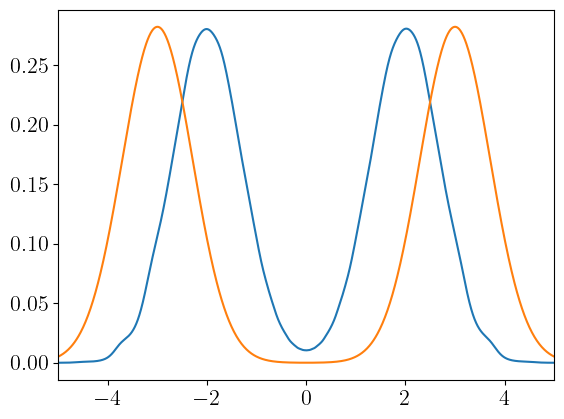

(-5.0, 5.0)

In [28]:
plt.plot(Float64.(real.((opt_real.freq))), Float64.(imag.(opt_real.val))/pi)
plt.plot(omegas, rho.(omegas))
#plt.plot(Float64.(real.((raw_reals.freq))), Float64.(imag.(raw_reals.val))/pi)
plt.xlim(-5,5)
#plt.ylim(0.0,50)

In [13]:
#=
mesh = 1024
myx = 40*(collect(1:mesh) .- mesh/2) ./ mesh
myy = 20*(collect(1:mesh) .- 1) ./ mesh
hardy_plot = Array{Complex{BigFloat}}(undef, mesh, mesh) 
for i in 1:mesh
    for j in 1:mesh
        hardy_plot[j,i] = hardy_basis(myx[j],myy[i],20)
    end
end
plt.figure(figsize=(3.7,1.5))
#plt.pcolormesh(myx, myy, real.(hardy_basis.(myx,myy,1)'), shading="auto")
plt.pcolormesh(myx, myy, Float64.(real.(hardy_plot')))
#plt.pcolormesh(myx, myy, Float64.(imag.(conj.(hardy_plot)')))
ax = plt.gca()
ax.set_xlim([-20,20])
ax.set_ylim([0,1])
#ax.set_aspect("equal")
plt.colorbar()
plt.show()
=#

In [14]:
#=
f = open( "in_green.dat", "w")
for iw in 1:hnw
    IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]
    omega = IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]*pi/beta
    green = gw[hnw+iw]
    println(f, "$omega \t $(real(green)) \t $(imag(green))")
end
close(f)
g = open( "input.txt", "w")
    println(g,"in_green.dat \t $hnw \tout_spec.dat")
close(g)
=#
#=
f = open("in_green.dat", "r")
for i in 1:hnw
    list = readline(f)
    s  = split(list,'\t')
    o  = parse(BigFloat, s[1])
    re = parse(BigFloat, s[2])
    ii = parse(BigFloat, s[3])
    test_smpl[i] = o
    test_gw[i]   = re + ii*im
end
close(f)
=#